# Лекция 04. Классификация, деревья решений и  метод k-ближайщих соседей

## План лекции

1. Введение
2. Дерево решений
3. Метод ближайших соседей
4. Выбор параметров модели и перекрестная проверка (кросс-валидация)
5. Примеры применения и сложные случаи
6. Плюсы и минусы деревьев решений и матода ближайших соседей
7. Полезные источники

## 1. Введение

Прежде чем мы погрузимся в материал лекции для этой недели, давайте поговорим о том, какой вид проблем мы будем решать и их место в такой захватывающей области, как машинное обучение. Кника Т. Митчелла - Машинное обучение (1997), дает нам классичесное, базовое определение машинному обучению, которое звучит как:

> Говорят, что компьютерная программа обучается на основе опыта E по отношению к некоторому классу задач T и меры эффективности P, если эффективность решения задач из T, измеренное на основе P, улучшается с приобретением опыта E.

!In the various problem settings T, P, and E can refer to completely different things. Некоторые из наиболее популярных задач Т в машинном обучении это:

- отнесение экземпляра к одной из категорий на основе его характеристик;
- регрессия – прогнозирование числового целевого значения на основе других объектов экземпляра;
- кластеризация – определение разделов экземпляров на основе их характеристик, чтобы члены внутри групп были более похожи друг на друга, чем в других группах;
- обнаружение аномалий – поиск экземпляров, которые "сильно отличаются" от остальной части объектов или некоторой группы объектов;
- и многое другое.

Хороший обзор представлен в книге "Основы машинного обучения" в главе ["Глубокое обучение"](http://www.deeplearningbook.org) (авторы: Ian Goodfellow, Yoshua Bengio, Aaron Courville, 2016).

Опыт E относится к данным (мы не можем ничего без них).  Алгоритмы машинного обучения можно разделить на те, которые обучаются контролируемым или неконтролируемым методом. При некотролируемом методе обучения, имеется имеется набор, состоящий из элементов, описанных набором характеристик. При контролируемом методе обучения, также существует целевая переменная, которую мы хотели бы иметь возможность предсказать, известная для каждого экземпляра в учебном наборе.

#### Пример
Классификация и регрессия относятся к контролируемому методу обучения. Например, как кредитная организация, мы можем хотеть предсказать дефолты по кредитам на основе данных, накопленных о наших клиентах. Здесь опыт E-это доступные данные обучения: набор элементов (клиентов), набор характеристик (таких как возраст, зарплата, тип кредита, прошлые дефолты по кредитам и т. д.) для каждого, и искомого значения (будь то дефолт по кредиту). Искомая переменная является всего лишь фактом дефолта по кредиту (0 или 1), поэтому это (двоичная) проблема классификации.  Если бы вместо нужно было предсказать, на сколько времени просрочен платеж по кредиту, это стало бы проблемой регрессии.
 
Наконец, третий термин, используемый в определении машинного обучения, является метрикой оценки производительности алгоритма P. Такие метрики различаются для различных задач и алгоритмов, и мы обсудим их по мере изучения новых алгоритмов. Сейчас мы обратимся к простой метрике для алгоритмов классификации, пропорции правильных ответов – точности – на тестовом наборе.
 
Давайте рассмотрим две проблемы контролируемого обучения: классификацию и регрессию.


## 2. Дерево решений 
Мы начинаем наш обзор методов классификации и регрессии с одного из самых популярных – дерева решений. Деревья решений используются в повседневных решениях, а не только в машинном обучении. {!Flow diagrams!} Блок-схемы на самом деле являются визуальными представлениями деревьев решений. Например, Высшая Школа Экономики публикует информационные схемы, чтобы облегчить жизнь своим сотрудникам. Вот фрагмент инструкции по публикации статьи на портале учреждения.

<img align='center' src='../../img/topic3_hse_instruction.png' width=50%><br>

С точки зрения машинного обучения схему можно рассматривать как простой классификатор, определяющий соответствующую форму публикации (книга, статья, глава книги, препринт, публикация в "Высшей Школе Экономики и СМИ") на основе содержания (книга, брошюра, статья), типа журнала, типа оригинального издания (научный журнал, труды) и др.
 
Дерево решений часто является обобщением опыта экспертов, средством обмена знаниями о конкретном процессе. Например, до внедрения масштабируемых алгоритмов машинного обучения задача кредитной оценки в банковском секторе решалась экспертами. Решение о предоставлении кредита принималось на основе некоторых интуитивно (или эмпирически) выведенных правил, которые можно было представить в виде дерева решений.

<img src="../../img/credit_scoring_toy_tree_english.png" align='center'><br>

В нашем следующем примере мы решаем проблему бинарной классификации (одобряем/отказываем в кредите) по признакам "возраст", "наличие собственного жилья", "доход" и "образование".
 
Дерево решений как алгоритм машинного обучения по существу то же самое, что и схема, показанная выше; мы включаем поток логических правил вида "значение функции $а$ меньше $x$ и значение функции $b$ меньше $y$ ... = > Категория 1 " в древовидную структуру данных. Преимущество этого алгоритма заключается в том, что он легко интерпретируются. Например, используя вышеописанную схему, банк может объяснить клиенту, почему ему было отказано в кредите: например, у клиента нет собственного дома, а его доход составляет менее 5000.

Как мы увидим позже, многие другие модели, хотя и более точные, однако они не обладают этим свойством и могут рассматриваться скорее как подход "черного ящика", где сложнее интерпретировать, как входные данные были преобразованы в выходные. Благодаря этой "понятности" и сходству с человеческим процессом принятия решений (вы можете легко объяснить свою модель своему боссу), деревья решений приобрели огромную популярность. C4.5, представитель этой группы методов классификации, является даже первым в списке 10 лучших алгоритмов интеллектуального анализа данных ("Top 10 Algorithms in Data Mining", Knowledge and Information Systems, 2008. [PDF](http://www.cs.uvm.edu/~icdm/algorithms/10Algorithms-08.pdf)).

### Как построить дерево решений

Ранее мы говорили, что решение о предоставлении кредита принимается на основе возраста, активов, доходов и других переменных. Но какую переменную посмотреть сначала? Давайте рассмотрим простой пример, где все переменные являются двоичными.
 
Вспомним игру "20 вопросов", на которую часто ссылаются при представлении дерева решений. Вы, наверное, играли в эту игру - один человек загадывает знаменитость, а другой пытается угадать, задавая только "да" или "нет" вопросы. Какой вопрос он сначала задаст? Конечно, он спросят тот, который сужает число оставшихся вариантов ответов больше всего. Например игрок спрашивает: "Это Анджелина Джоли?", в случае отрицательного ответа, останутся все знаменитости, кроме одной. Напротив, спрашивая: "является ли знаменитость женщиной?- это уменьшило бы число возможных знаменитостей примерно наполовину. То есть, характеристика "пол" разбивает набор данных (знаменитостей) намного лучше, чем другие характеристики, такие как "Анджелина Джоли", "испанский" или "любит футбол". Это рассуждение соответствует концепции получения информации, основанной на энтропии.

#### Энтропия
Энтропия Шеннона определяется для системы с N возможными состояниями следующим образом:

$$\Large S = -\sum_{i=1}^{N}p_i \log_2{p_i},$$

где $p_i$ - вероятность нахождения системы в $i$ - ом состоянии. Это очень важное понятие, используемое в физике, теории информации и других областях. Энтропию можно описать как степень хаоса в системе. Чем выше энтропия, тем менее упорядочена система и наоборот. Это поможет нам формализовать "эффективное разбиение данных", на которое мы ссылались в контексте "20 вопросов".

#### {!Toy Example!}
Чтобы проиллюстрировать, как энтропия может помочь нам определить лучшие характеристики для построения дерева решений, давайте рассмотрим игрушечный пример. Мы будем предсказывать цвет шара на основе его положения.

<img align='center' src='../../img/decision_tree3.png'><br>

Есть 9 синих шаров и 11 желтых шаров. Если мы случайно вытащим шар, то он будет синим с вероятностью $p_1=\frac{9}{20}$ и желтым с вероятностью $p_2=\frac{11}{20}$,что дает нам энтропию $S_0 = -\frac{9}{20}\log_2{\frac{9}{20}}-\frac{11}{20}\log_2{\frac{11}{20}} \approx 1$. Это значение само по себе не скажет нам многого, но давайте посмотрим, как изменится значение, если мы разобьем шары на две группы: с позицией меньше или равной 12 и больше 12.

<img align='center' src='../../img/topic3_entropy_balls2.png'><br>


Левая группа имеет 13 шаров, 8 синих и 5 желтых. Энтропия этой группы составляет $S_1 = -\frac{5}{13}\log_2{\frac{5}{13}}-\frac{8}{13}\log_2{\frac{8}{13}} \approx 0.96$.Правая группа имеет 7 шаров, 1 синий и 6 желтый. Энтропия правой группы равна $S_2 = -\frac{1}{7}\log_2{\frac{1}{7}}-\frac{6}{7}\log_2{\frac{6}{7}} \approx 0.6$. . Как вы можете видеть, энтропия уменьшилась в обеих группах, тем более в правой группе. Поскольку энтропия-это, по сути, степень хаоса (или неопределенности) в системе, то уменьшение энтропии называется информационным усилением. Формально информационный выигрыш (IG) для разбиения на основе переменной $Q$ (в данном примере это переменная "$x \leq 12$") определяется как

$$\Large IG(Q) = S_O - \sum_{i=1}^{q}\frac{N_i}{N}S_i,$$

где $q$  - количество групп после разбиения, $N_i$  - количество объектов из выборки, в которой переменная $Q$ равна $i$-му значению. В нашем примере разделение дало две группы ($q = 2$), одна из 13 элементов ($N_1 = 13$), другая из 7 ($N_2 = 7$). Поэтому мы можем вычислить информационный выигрыша как

$$ \Large IG(x \leq 12) = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2 \approx 0.16.$$

Получается, деление шаров на две группы путем разбиения на "значения элементов меньше или равных 12" дало нам более упорядоченную систему. Давайте продолжим делить их на группы, пока шары в каждой группе не будут одного цвета.

<img align='center' src='../../img/topic3_credit_scoring_entropy.png'><br>

Для правой группы мы с легкостью замечаем, что нам нужено только одино дополнительное разбиение, используя "значения переменных меньше или равны 18". Но для левой группы нам нужно еще три. Обратите внимание, что энтропия группы, где все шары одного цвета, равна 0 ($\log_2{1} = 0$).

Мы успешно построили дерево решений, которое предсказывает цвет шара на основе его положения. Это дерево решений может плохо работать, если мы добавим какие-либо еще шары, потому что оно идеально подходит для тренировочного набора (начальные 20 шаров). Если бы мы хотели преуспеть и в случае с большим числом шаров, дерево с меньшим количеством "вопросов" или расколов было бы более точным, даже если оно не идеально подходило бы для тренировочного набора. Мы обсудим проблему переобучения позже.

### Алгоритм построения дерева 

Мы можем убедиться, что дерево, построенное в предыдущем примере, является оптимальным: потребовалось всего 5 "вопросов" (обусловленных переменной $x$), чтобы идеально подогнать дерево решений к учебному набору. При других условиях разделения результирующее дерево будет глубже, т. е. потребуется больше "вопросов", чтобы получить ответ.
 
В основе популярных алгоритмов построения дерева решений, таких как ID3 или C4.5, лежит принцип жадной максимизации информативности выигрыша: на каждом шаге алгоритм выбирает переменную, которая дает наибольший информационный выигрыш при расщеплении. Затем процедура повторяется рекурсивно до тех пор, пока энтропия не будет равна нулю (или некоторому малому значению !для расчета переобучения!). Различные алгоритмы используют различные эвристики для "ранней остановки" или "отсечения", чтобы избежать построения переполненного дерева.

```python
def build(L):
    create node t
    if the stopping criterion is True:
        assign a predictive model to t
    else:
        Find the best binary split L = L_left + L_right
        t.left = build(L_left)
        t.right = build(L_right)
    return t     
```

### Другие критерии качества для разбиений в задачах классификации

Мы обсуждали, как энтропия позволяет нам формализовать разделы в дереве. Но это только одна эвристика; существуют и другие:

- Неопределенность Джини (загрязнение Джини): $G = 1 - \sum\limits_k (p_k)^2$. Увеличения этого критерия можно интерпретировать как увеличение числа пар объектов одного класса, которые находятся в одном поддереве (не путать с индексом Джини).
- Ошибка неправильной классификации: $E = 1 - \max\limits_k p_k$

На практике ошибка неправильной классификации почти никогда не используется, и неопределенность Джини и !увелечение информативности! работают аналогично.
 
Для бинарной классификации энтропия и неопределенность Джини принимают следующий вид:

$ S = -p_+ \log_2{p_+} -p_- \log_2{p_-} = -p_+ \log_2{p_+} -(1 - p_{+}) \log_2{(1 - p_{+})};$

$ G = 1 - p_+^2 - p_-^2 = 1 - p_+^2 - (1 - p_+)^2 = 2p_+(1-p_+).$

где ($p_+$ - вероятность того, что объект имеет метку +).

Если мы построим эти две функции по аргументу $p_+$, мы увидим, что график энтропии очень близок к графику неопределенности Джини, удвоенному. Поэтому на практике эти два критерия практически идентичны.

In [3]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt

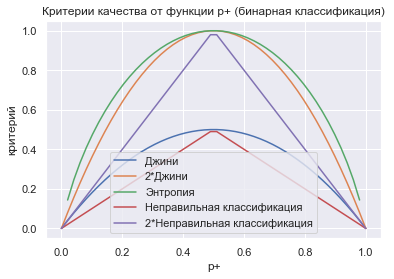

In [4]:
plt.figure(figsize=(6, 4))
xx = np.linspace(0,1,50)
plt.plot(xx, [2 * x * (1-x) for x in xx], label='Джини')
plt.plot(xx, [4 * x * (1-x) for x in xx], label='2*Джини')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='Энтропия')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label='Неправильная классификация')
plt.plot(xx, [2 - 2 * max(x, 1-x) for x in xx], label='2*Неправильная классификация')
plt.xlabel('p+')
plt.ylabel('критерий')
plt.title('Критерии качества от функции p+ (бинарная классификация)')
plt.legend();

#### Пример
Давайте рассмотрим подгонку дерева решений к некоторым синтетическим данным. Мы будем генерировать выборки из двух классов, оба класса это нормальные распределения, но с разными средними.

In [16]:
# first class
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# adding second class
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

Давайте построим график данных. Неформально задача классификации в этом случае состоит в том, чтобы построить некоторую "хорошую" границу, отделяющую два класса (красные точки от желтых). Машинное обучение в этом случае сводится к выбору хорошей разделительной границы. Прямая линия будет слишком простой, в то время как некоторые сложные кривые, прходящие в каждой красной точке, будут слишком сложными и приведут нас к ошибкам на новых образцах. Интуитивно, некоторая гладкая граница, или, по крайней мере, прямая или гиперплоскость, будет хорошо работать на новых данных.

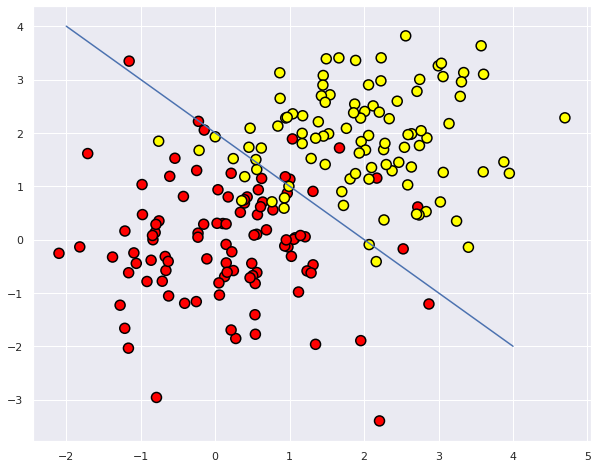

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

Давайте попробуем разделить эти два класса путем обучения дерева решений библиотеки `Sklearn`. Мы будем использовать параметр `max_depth`, который ограничивает глубину дерева. Давайте визуализируем полученную разделительную границу.

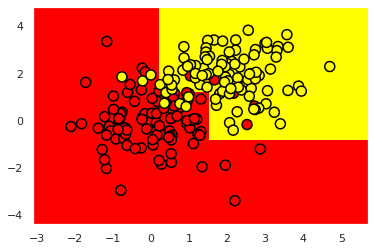

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);

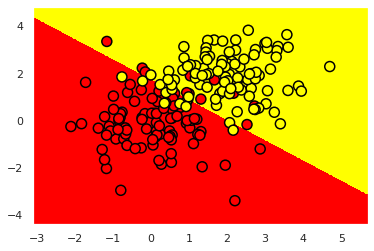

In [19]:
from sklearn.linear_model import LogisticRegression
logregr = LogisticRegression()
logregr.fit(train_data, train_labels)

xx, yy = get_grid(train_data)
predicted = logregr.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);

А как выглядит само дерево? Мы видим, что дерево "разрезает" пространство на 8 прямоугольников, т. е. дерево имеет 8 листьев. Внутри каждого прямоугольника дерево будет делать прогноз в соответствии с !большинством меток объектов! внутри него.

In [20]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

In [21]:
tree_graph_to_png(tree=clf_tree, feature_names=['x1', 'x2'], 
                  png_file_to_save='../../img/topic3_tree2.png')

<img src='../../img/topic3_tree2.png'>

#### Как мы можем "читать" такое дерево?
 
В начале было 200 образцов (экземпляров), по 100 каждого класса. Энтропия начального состояния была максимальной, $S=1$. Затем было произведено первое разбиение выборок на 2 группы путем сравнения значения $x_2$ с $1.211$ (найдите эту часть границы на рисунке выше). При этом энтропия как левой, так и правой групп уменьшилась. Процесс продолжается до глубины 3. В этой визуализации чем больше образцов первого класса, тем темнее оранжевый цвет вершины; чем больше образцов второго класса, тем темнее синий. В начале число выборок из двух классов равно, поэтому корневой узел дерева белый.

### Как дерево решений работает с числовыми объектами

Предположим, у нас есть числовой объект "возраст", который имеет много уникальных значений. Дерево решений будет искать лучшее (в соответствии с некоторым критерием увеличения значения) разделение, проверяя двоичные атрибуты, такие как "возраст < 17", "возраст < 22.87" и т. д. Но что делать, если возрастной диапазон большой? Или что, если другая количественная переменная, "зарплата", также может быть "разделена" многими способами? На каждом этапе построения дерева будет слишком много двоичных атрибутов для выбора. Чтобы решить эту проблему, эвристики обычно используют ограничивающее число, с которыми сравнивают количественную переменную.
 
Давайте рассмотрим пример. Предположим, у нас есть следующий набор данных:

In [6]:
data = pd.DataFrame({'Age': [17,64,18,20,38,49,55,25,29,31,33], 
             'Loan Default': [1,0,1,0,1,0,0,1,1,0,1]})
data

,Age,Loan Default
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


Давайте отсортируем его по возрасту в порядке возрастания.

In [7]:
data.sort_values('Loan Default')

,Age,Loan Default
1,64,0
3,20,0
5,49,0
6,55,0
9,31,0
0,17,1
2,18,1
4,38,1
7,25,1
8,29,1


In [8]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data['Age'].values.reshape(-1, 1), data['Loan Default'].values)

tree_graph_to_png(age_tree, feature_names=['Age'], 
                 png_file_to_save='../../img/topic_tree3.png')

NameError: name 'DecisionTreeClassifier' is not defined

<img src='../../img/topic_tree3.png' width=30%>
<img src='../../img/topic_tree2.png' width=30%>

Мы видим, что дерево использовало следующие 5 значений для оценки по возрасту: 43.5, 19, 22.5, 30 и 32 года. Если вы посмотрите внимательно, то заметите, что это средние значения между возрастами, в которых целевой класс "переключается" с 1 на 0 или 0 на 1. Чтобы проиллюстрировать возьмем значение 43,5 - это в среднее между 38 и 49 годами; 38-летний клиент не смог вернуть кредит, тогда как 49-летний это сделал. Дерево ищет значения, при которых целевой класс переключает свое значение в качестве порога для !"вырезания"! количественной переменной.
 
Учитывая эту информацию, почему вы думаете, что здесь нет смысла рассматривать такую функцию, как "возраст < 17,5"?

Рассмотрим более сложный пример, добавив переменную "зарплата" (в тысячах долларов в год).

In [25]:
data2 = pd.DataFrame({'Age':  [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33], 
                      'Salary': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88], 
             'Loan Default': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]})
data2

,Age,Salary,Loan Default
0,17,25,1
1,64,80,0
2,18,22,1
3,20,36,0
4,38,37,1
5,49,59,0
6,55,74,0
7,25,70,1
8,29,33,1
9,31,102,0


Если мы сортируем по возрасту, целевой класс ("loan default") переключается (от 1 до 0 или наоборот) 5 раз. А если отсортировать по зарплате, то она меняется в 7 раз. Как дерево теперь будет выбирать объекты? Давайте посмотрим.

In [26]:
data2.sort_values('Age')

,Age,Salary,Loan Default
0,17,25,1
2,18,22,1
3,20,36,0
7,25,70,1
8,29,33,1
9,31,102,0
10,33,88,1
4,38,37,1
5,49,59,0
6,55,74,0


In [27]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[['Age', 'Salary']].values, data2['Loan Default'].values);

In [28]:
tree_graph_to_png(tree=age_sal_tree, feature_names=['Age', 'Salary'],
                  png_file_to_save='../../img/topic_tree3.png')

<img src='../../img/topic_tree3.png' width=30%>

Мы видим, что дерево разделено как по зарплате, так и по возрасту. Кроме того, пороговые значения для сравнения признаков составляют 43,5 и 22,5 лет и 95 тыс. и 30,5 тыс. в год. Опять же, мы видим, что 95-это средний показатель между 88 и 102; человек с зарплатой 88 тыс. оказался "плохим", а тот, у кого было 102 тыс., был "хорошим". То же самое касается и 30,5 тыс. То есть было найдено лишь несколько значений для сравнения по возрасту и зарплате.  Почему дерево выбрало именно эти значения? Потому что это дало лучшее разделение (по критерию Джини).

**Вывод**: самая простая эвристика для обработки числовых объектов в дереве решений-это сортировка его значений в порядке возрастания и проверка только тех пороговых значений, где изменяется значение целевой переменной.

Кроме того, при наличии большого количества числовых объектов в наборе данных, каждый из которых имеет много уникальных значений, выбираются только верхние N пороговых значений, описанных выше, т. е. используются только верхние N значений, которые дают максимальный !выигрыш!. Процесс состоит в том, чтобы построить дерево глубины 1, вычислить энтропию (или неопределенность Джини) и выбрать лучшие пороги для сравнения.

Для иллюстрации, если мы разделим на "зарплату $\leq$ 34.5", левая подгруппа будет иметь энтропию 0 (все клиенты "плохие"), а правая будет иметь энтропию 0.954 (3 "плохих" и 5 "хороших", вы можете проверить это сами, поскольку это будет частью задания). !Прирост информации! составляет примерно 0.3.
Если мы разделим на "зарплату $\leq$ 95", левая подгруппа будет иметь энтропию 0,97 (6 "плохих" и 4 "хороших"), а правая будет иметь энтропию 0 (группа, содержащая только один объект). Прирост информации составляет около 0,11.
Если мы рассчитываем прирост информации для каждой секции таким образом, мы можем выбрать пороговые значения для сравнения каждого числового объекта перед построением большого дерева (с использованием всех объектов).

Больше примеров дискретизации числовых функций можно найти в таких постах как ["A Simple Guide to Entropy-Based Discretization"](http://kevinmeurer.com/a-simple-guide-to-entropy-based-discretization/) или ["Discretizing a continuous variable using Entropy"](http://clear-lines.com/blog/post/Discretizing-a-continuous-variable-using-Entropy.aspx). Одна из наиболее известных научных работ на эту тему !"On the handling of continuous-valued attributes in decision tree generation"! (UM Fayyad. KB Irani, "Machine Learning", 1992).

### Критические Параметры Дерева

Технически, вы можете построить дерево решений, пока каждый лист не будет иметь ровно один экземпляр, но это не часто встречается на практике при построении !одного! дерева, потому что оно будет !*переоснащенное*!, или слишком настроено на обучающий набор, и не будет хорошо предсказывать метки для новых данных. В нижней части дерева, на некоторой достаточно большой глубине, будут разделы по менее важным характеристикам (например, пришел ли клиент из Лидса или Нью-Йорка). Мы можем еще больше раздуть эту историю и обнаружить, что все четыре клиента, пришедшие в банк за кредитом в зеленых штанах, не вернули кредит. Даже если бы это было верно в обучении, мы не хотим, чтобы наша модель классификации генерировала такие конкретные правила.
 
Есть два исключения, когда деревья строятся на максимальную глубину:
- Случайный лес (группа деревьев) усредняет ответы от отдельных деревьев, которые построены на максимальную глубину (мы поговорим позже о том, почему это необходимо сделать)
- *Обрезание * деревьев. При таком подходе дерево сначала строится на максимальную глубину. Затем, снизу вверх, некоторые узлы дерева удаляются путем сравнения качества дерева с этим разделом и без него (сравнение выполняется с помощью *перекрестной проверки*, подробнее об этом ниже). 

На рисунке ниже приведен пример разделительной границы, построенной в переполненном дереве.

<img align='center' src='https://habrastorage.org/files/f9f/3b5/133/f9f3b5133bae460ba96ab7e546155b1d.png'><br>

Наиболее распространенными способами борьбы с переполнением в деревьях решений являются следующие:
- искусственное ограничение глубины или минимальное количество элементов в листьях: строительство дерева просто останавливается в какой-то момент;
- подрезать дерево.

### Класс DecisionTreeClassifier в Scikit-learn
Основными параметрами класса [`sklearn.tree.DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) являются:

- `max_depth` – максимальная глубина дерева;
- `max_features` - максимальное количество характеристик, с помощью которых можно найти лучшее разбиение (это необходимо при большом количестве характеристик, потому что было бы "затратно" искать разбиение для *всех* характеристик);
- `min_samples_leaf` – минимальное количество элементов в листе. Этот параметр предотвращает создание деревьев, где всякий лист будет иметь лишь небольшое число элементов.

Параметры дерева должны быть установлены в зависимости от входных данных, и это обычно делается с помощью *перекрестной проверки*, подробнее об этом ниже.

### Дерево Решений в Регрессиионной задаче

При прогнозировании !числовой переменной! идея построения дерева остается прежней, но критерии качества меняются: 

- Дисперсия: 

$$\Large D = \frac{1}{\ell} \sum\limits_{i =1}^{\ell} (y_i - \frac{1}{\ell} \sum\limits_{j=1}^{\ell} y_j)^2, $$

где $\ell$ - количество элементов в листе, $y_i$ - значение целевой переменной. Проще говоря, минимизируя дисперсию вокруг среднего, мы ищем объекты, которые разделяют обучающий набор таким образом, что значения целевого объекта в каждом листе примерно равны.

#### Пример
Давайте сгенерируем некоторые данные, определенные функцией: $f(x) = e^{-x ^ 2} + 1.5 * e^{-(x - 2) ^ 2}$ с некоторым шумом. Затем мы натренируем на них дерево и посмотрим, какие предсказания оно делает.

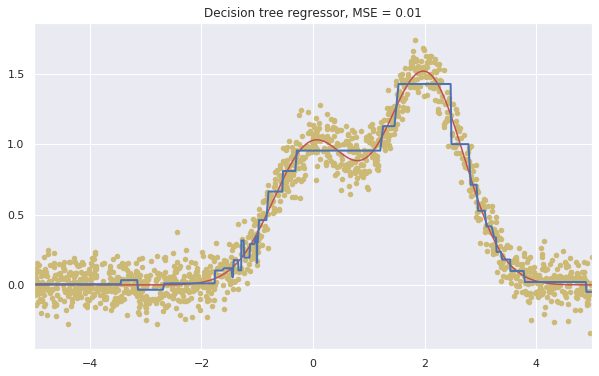

In [29]:
n_train = 1500       
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="y", s=20)
plt.plot(X_test, reg_tree_pred, "b", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % (np.sum((y_test - reg_tree_pred) ** 2) / n_test))
plt.show()

Мы видим, что дерево решений аппроксимирует данные кусочно-непрерывной функцией.

## 3. Метод Ближайших Соседей

*Метод ближайших соседей* (k-Nearest Neighbors, или k-NN) является еще одним очень популярным методом классификации, который также иногда используется в задачах регрессии. Он, как и деревья решений, является одним из наиболее понятных подходов к классификации. На уровне интуиции суть метода заключается в том, что вы похожи на своих соседей. Более формально метод следует гипотезе компактности: если метрика расстояния между примерами введена достаточно удачно, то схожие примеры с гораздо большей вероятностью относятся к одному и тому же классу.

Согласно методу ближайших соседей, зеленый шар будет классифицирован как "синий", а не "красный".

<img src='../../img/kNN.png' align='center'><br>

Например, если вы не знаете, к какому тегу отнести Bluetooth-гарнитуру в интернет-объявлении, вы можете найти 5 похожих гарнитур, и, если 4 из них отнесены к "аксессуарам" и только 1 к "технологиям", то вы также можете отнести ее в раздел "аксессуары".
 
Чтобы классифицировать каждый элемент из тестового набора, необходимо выполнить следующие операции по порядку:
1. Вычислите расстояние до каждого из объектов в обучающем наборе.
2. Выберете $k$ элементов из обучающего набора с минимальным расстоянием до них.
3. Класс тестового объекта будет самым часто встречающимся классом среди этих $k$ ближайших соседей.

Метод довольно легко адаптируется к задаче регрессии: на Шаге 3 он возвращает не класс, а число – среднее (или медиану) целевой переменной среди соседей.
 
Примечательной особенностью этого подхода является его ленивость - расчеты производятся только на этапе прогнозирования, когда тестовая выборка нуждается в классификации. Никакая модель не строится исходя из обучающих примеров заранее. В этом заключается лтличие от деревьев решений расмотренных в первой половине этой статьи которые строются на основе обучающего набора, и классификация тестовых случаев происходит относительно быстро путем обхода дерева.

Ближайшие соседи-это хорошо изученный подход. Существует много важных теорем, утверждающих, что на "бесконечных" наборах данных это оптимальный метод классификации. Авторы классической книги "The Elements of Statistical Learning" считают k-NN теоретически идеальным алгоритмом, использование которого ограничено только вычислительной мощностью и [проклятием размерностей] (https://en.wikipedia.org/wiki/Curse_of_dimensionality). 

### Практическое применение метода ближайших соседей
- k-NN может служить хорошей отправной точкой ((baseline/базовой линией) в некоторых случаях;
- В соревнованиях Kaggle kNN часто используется для построения мета-признаков (прогноз kNN подается на вход другим моделям) или в стекинге/блендинге;
- Метод ближайших соседей распространяется на другие задачи, такие как рекомендательные системы. Первоначальным решением может быть рекомендация продукта (или услуги), который популярен среди *ближайших соседей* человека, для которого мы хотим сделать рекомендацию;
- На практике на больших наборах данных часто используются приближенные методы поиска ближайших соседей. Существует ряд библиотек с открытым исходным кодом, которые реализуют такие алгоритмы; взгляните на библиотеку [Annoy](https://github.com/spotify/annoy).

Качество классификации/регрессии при k-NN зависит от нескольких параметров:

- Число соседей $k$.
- Метрика расстояния между объектами (часто используются расстояния Хэмминга, Евклидова, Косинуса и Минковского). Обратите внимание, что большинство этих метрик требуют масштабирования данных. Проще говоря, мы не хотим, чтобы характеристика "зарплата", значение которой составляет порядка нескольких тысяч, влияла на расстояние больше, чем "возраст", который обычно меньше 100. 
- Веса соседей (каждый сосед может вносить разные веса; например, чем дальше элемент, тем меньше вес).

### Класс `KNeighborsClassifier` в Scikit-learn
Основными параметрами класса `sklearn.neighbors.KNeighborsClassifier` является:
- weights: `uniform` (все веса равны), `distance` (вес обратно пропорционален расстоянию до тестового примера), или другая функция определенная пользователем;
- algorithm (опционально): `brute`, `ball_tree `, `KD_tree`, или `auto`. В первом случае ближайшие соседи для каждого тестового случая вычисляются путем перебора обучающей выборки. Во втором и третьем случаях расстояния между примерами сохраняются в дереве для ускорения поиска ближайших соседей. Если вы установите этот параметр в `auto`, правильный способ поиска соседей будет автоматически выбран на основе обучающей выборки.
- leaf_size (опционально): порог переключения на полный перебор в случае выбора BallTree или KDTree для нахождения соседей;
- metric: `minkowski`, `manhattan `, `euclidean`, `chebyshev`, или другие.

## 4. Выбор параметров модели и кросс-валидация

Основная задача алгоритмов обучения - уметь *обобщать* неочевидные данные. Поскольку мы не можем сразу проверить производительность модели на новых, поступающих данных (потому что мы еще не знаем истинных значений целевой переменной), необходимо пожертвовать небольшой частью данных, чтобы проверить качество модели на нем.

Это часто делается одним из двух способов:
- выделение части набора данных (отложенная выборка) (*held-out/hold-out set*). Таким образом, мы резервируем часть обучающего набора (обычно от 20% до 40%), обучаем модель на оставшихся данных (60-80% от исходного набора) и вычисляем показатели производительности для модели (например, точность) на отложенной выборке.
- *cross-validation*. Наиболее частым случаем здесь является *k-fold cross-validation*.

<img align='center' src='../../img/cross_validation.png'><br>

В k-кратной перекрестной проверке модель обучается $K$ раз на разных ($K-1$) подмножествах исходного набора данных (белым цветом) и проверяется на оставшемся подмножестве (каждый раз на разной, показанный выше оранжевым цветом).
Мы получаем оценки качества модели $K$, которые обычно усредняются, чтобы показать общее среднее качество классификации/регрессии модели.

Перекрестная валидация обеспечивает лучшую оценку качества модели по новым данным по сравнению с подходом, основанным на отложенной выборке. Однако, перекрестная проверка является вычислительно дорогой, когда у вас есть большой набор данных.
 
Перекрестная проверка является очень важным методом в машинном обучении, а также может применяться в статистике и эконометрике. Она помогает с настройкой гиперпараметра, сравнением моделей, оценкой функций и т. д. Более подробную информацию можно найти [здесь](https://sebastianraschka.com/blog/2016/model-evaluation-selection-part1.html) (blog post by Sebastian Raschka) или в любом классическом учебнике по машинному (статистическому) обучению.

## 5. Примеры применения и сложные случаи

### Деревья решений и метод ближайших соседей в задаче прогнозирования оттока клиентов  

Давайте считаем данные в `DataFrame` и предварительно обработаем их. Сохраним *State* в отдельный объект `Series`, а сам объект удалим из датафрейма. Мы обучим первую модель без объекта *State*, а затем посмотрим, поможет ли его добавление.

In [30]:
df = pd.read_csv('../../data/telecom_churn.csv')

df['International plan'] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] = df['Churn'].astype('int')
states = df['State']
y = df['Churn']
df.drop(['State', 'Churn'], axis=1, inplace=True)

In [31]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


Выделим 70% набора для обучения (`X_train`, `y_train`) и 30% для отложенной выборки (`X_holdout`, `y_holdout`). Отложенная выборка не будет участвовать в настройке параметров моделей. Мы будем использовать ее в конце, после настройки, чтобы оценить качество полученной модели. Давайте обучим 2 модели: дерево решений и k-NN. Мы не знаем, какие параметры хороши, поэтому будем брать некоторые случайные: глубина дерева равна 5, а число ближайших соседей равно 10.

In [32]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
random_state=17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)

# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

Давайте оценим качество прогноза на отложенной выборке с помощью простой метрики - доли правильных ответов (точности). Дерево решений было лучше: процент правильных ответов составляет около 94% (дерево решений) против 88% (k-NN). Обратите внимание, что эта производительность достигается с помощью случайных параметров.

In [33]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred) # 0.94

0.93999999999999995

In [34]:
knn_pred = knn.predict(X_holdout_scaled)
accuracy_score(y_holdout, knn_pred) # 0.89

0.89000000000000001

Теперь давайте определим параметры для дерева с помощью перекрестной проверки. Мы настроим максимальную глубину и максимальное количество параметров, используемых при каждом разделении. Вот суть того, как работает GridSearchCV: для каждой уникальной пары значений `max_depth` и `max_features` вычисляется производительность модели с 5-кратной перекрестной проверкой, а затем выберается лучшая комбинация параметров.

In [35]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1,11),
               'max_features': range(4,19)}

tree_grid = GridSearchCV(tree, tree_params,
                         cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 163 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    8.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             pre_dispatch='2*n_jobs

Перечислим лучшие параметры и соответствующую среднюю точность из перекрестной проверки.

In [36]:
tree_grid.best_params_#{'max_depth': 6, 'max_features': 17}

{'max_depth': 6, 'max_features': 17}

In [37]:
tree_grid.best_score_ #0.94256322331761677

0.94256322331761677

In [38]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout)) #0.946

0.94599999999999995

Давайте нарисуем полученное дерево. Из-за того, что это не совсем игрушечный пример (его максимальная глубина составляет 6), картинка не такая уж и маленькая, но вы можете "пройтись" по дереву, если нажмете на картинку.

In [39]:
tree_graph_to_png(tree=tree_grid.best_estimator_, feature_names=df.columns,
                 png_file_to_save='../../img/topic3_tree4.png')

<img src='../../img/topic3_tree4.png'>

Теперь давайте настроим число соседей $k$ для k-NN:

In [40]:
from sklearn.pipeline import Pipeline

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params,
                        cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    1.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.8s finished


({'knn__n_neighbors': 7}, 0.88598371195885128)

In [41]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))

0.89000000000000001

Здесь дерево оказалось лучше, чем алгоритм ближайших соседей: 94,2%/94,6% точности для перекрестной проверки и отложенной выборки соответственно. Деревья принятия решений работают очень хорошо, и даже случайный лес (давайте подумаем об этом сейчас как о группе деревьев, которые лучше работают вместе) в этом примере не может достичь значительно лучшей производительности (95.1%/95.3%), несмотря на то, что он обучается гораздо дольше.

In [42]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5))) # 0.949

0.949423311981


In [43]:
forest_params = {'max_depth': range(6, 12),
                 'max_features': range(4, 19)}

forest_grid = GridSearchCV(forest, forest_params,
                           cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(X_train, y_train)

forest_grid.best_params_, forest_grid.best_score_ # ({'max_depth': 9, 'max_features': 6}, 0.951)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  3.4min finished


({'max_depth': 9, 'max_features': 6}, 0.95113587655379339)

In [44]:
accuracy_score(y_holdout, forest_grid.predict(X_holdout)) # 0.953

0.95299999999999996

### Сложный случай для деревьев решений

Чтобы продолжить обсуждение плюсов и минусов рассматриваемых методов, давайте рассмотрим простую задачу классификации, где дерево будет хорошо работать, но делает это "слишком сложным" образом. Давайте создадим набор точек на плоскости (2 признака), каждая точка будет одним из двух классов (+1 для красного или -1 для желтого). Если вы посмотрите на это как на проблему классификации, она кажется очень простой: классы разделены линией.

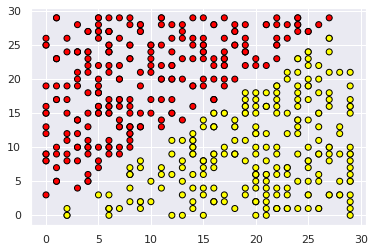

In [45]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, 
                                 x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1 = np.random.randint(x1_min, x1_max)
        x2 = np.random.randint(x2_min, x2_max)
        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)

X, y = form_linearly_separable_data()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black');

Однако граница, которую строит дерево решений, слишком сложна; плюс само дерево очень глубоко. Кроме того, представьте, насколько плохо дерево будет обобщаться на пространстве за пределами квадрата $30 \times 30$, который обрамляет обучающий набор.

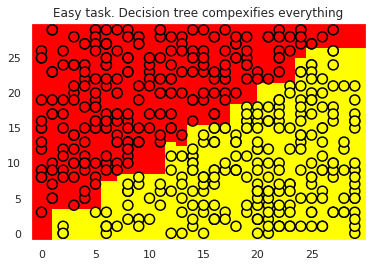

In [46]:
tree = DecisionTreeClassifier(random_state=17).fit(X, y)

xx, yy = get_grid(X)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5)
plt.title('Easy task. Decision tree compexifies everything');

Мы получили эту слишком сложную конструкцию, хотя решение - это просто прямая линия $x_1 = x_2$.

In [47]:
tree_graph_to_png(tree=tree, feature_names=['x1', 'x2'],
         png_file_to_save='../../img/topic3_tree5.png')

<img src='../../img/topic3_tree5.png'>

Метод одного ближайшего соседа работает лучше, чем дерево, но все еще не так хорош, как линейный классификатор (наша следующая тема).

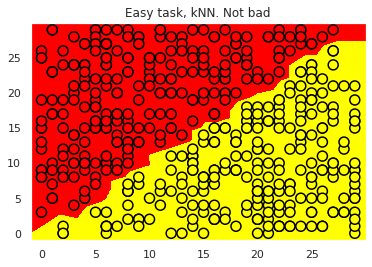

In [48]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X, y)

xx, yy = get_grid(X)
predicted = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);
plt.title('Easy task, kNN. Not bad');

###  Деревья решений и k-NN в задаче распознавания рукописных цифр MNIST

Теперь давайте посмотрим, как эти 2 алгоритма работают на реальной задаче. Мы будем использовать встроенный набор данных `sklearn` для рукописных цифр. Эта задача является примером, где k-NN работает на удивление хорошо.
 
Картинки здесь представлены матрицами 8х8 (интенсивность белого цвета для каждого пикселя). Затем каждая такая матрица "разворачивается" в вектор длины 64, и мы получаем признаковое описание объекта.
 
Давайте нарисуем несколько рукописных цифр. Мы видим, что они различимы.

In [49]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X[0,:].reshape([8,8])

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

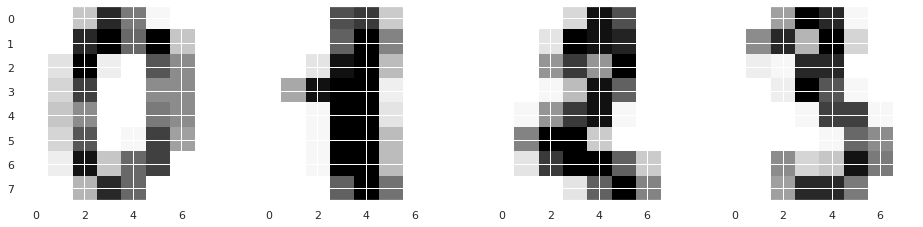

In [50]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):
    axes[i].imshow(X[i,:].reshape([8,8]), cmap='Greys');

Далее проведем тот же эксперимент, что и в предыдущей задаче, но на этот раз изменим диапазоны настраиваемых параметров.

Выберем 70% набора данных для обучения (`X_train`, `y_train`) и 30% для удержания (`X_holding`, `y_holdout`). Отложенная выборка не будет участвовать в настройке параметров модели; мы будем использовать ее в конце для проверки качества полученной модели.

In [51]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,random_state=17)

Давайте обучим дерево решений и kNN с нашими случайными параметрами.

In [52]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn_pipe = Pipeline([('scaler', StandardScaler()), 
                     ('knn', KNeighborsClassifier(n_neighbors=10))])

tree.fit(X_train, y_train)
knn_pipe.fit(X_train, y_train);

Теперь давайте рассчитаем прогнозы по нашему отложенному набору. Мы видим, что k-NN сделал намного лучше, но обратите внимание, что это со случайными параметрами.

In [53]:
tree_pred = tree.predict(X_holdout)
knn_pred = knn_pipe.predict(X_holdout)
accuracy_score(y_holdout, knn_pred), accuracy_score(y_holdout, tree_pred) # (0.976, 0.666)

(0.97592592592592597, 0.66666666666666663)

Теперь давайте настроим параметры нашей модели с помощью перекрестной проверки, как и раньше, но теперь мы будем учитывать, что у нас больше возможностей, чем в предыдущей задаче: 64. 

In [54]:
tree_params = {'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
               'max_features': [1, 2, 3, 5, 10, 20 ,30, 50, 64]}

tree_grid = GridSearchCV(tree, tree_params, 
                         cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 155 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 495 out of 495 | elapsed:    4.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
                         'max_features': [1, 2, 3, 5, 10, 20, 3

Давайте посмотрим на лучшее сочетание параметров и соответствующую точность от перекрестной проверки:

In [55]:
tree_grid.best_params_, tree_grid.best_score_ # ({'max_depth': 20, 'max_features': 64}, 0.844)

({'max_depth': 20, 'max_features': 64}, 0.84407319013524262)

Это уже лучше чем 66%, но все еще хуже чем 97%. kNN лучше работает с этим набором данных. В случае с одним ближайшим соседом мы смогли достичь 99% правильных прогнозов в перекрестной проверке.

In [56]:
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5)) # 0.987

0.98654584223971487

Давайте обучим случайный лес на этом же наборе данных, он работает лучше, чем kNN на большинстве наборов данных. Но у нас тут есть исключение.

In [57]:
np.mean(cross_val_score(RandomForestClassifier(random_state=17), X_train, y_train, cv=5)) # 0.935

0.93490856191104044

In [58]:
from sklearn.linear_model import LogisticRegression
logregr = LogisticRegression()
logregr.fit(X_train, y_train)
logregr_pred = logregr.predict(X_holdout)
accuracy_score(y_holdout, logregr_pred)


0.94999999999999996

Вы были бы правы, если бы указали, что мы не настроили здесь никаких параметров "случайного классификатора леса". Даже при настройке точность обучения не достигает даже 98%, как это было с одним ближайшим соседом.

Результаты
*(Обозначения: CV и Holdout– средние доли правильных ответов модели на кросс-валидации и отложенной выборке соответственно. DT – дерево решений, kNN – метод ближайших соседей, RF – случайный лес)*

|   algo\eval      |   CV  | Holdout |  
|---------|-------|---------|
| **DT**  | 0.844 |  0.838  |  
| **kNN** | 0.987 |  0.983  |
| **RF**  | 0.935 |  0.941  | 

**Заключение** этого эксперимента (и общий совет): сначала проверьте простые модели на ваших данных: дерево решений и ближайших соседей (в следующий раз мы также добавим логистическую регрессию в этот список). Возможно, эти методы уже достаточно хорошо работают на ваших данных.

### Сложный случай для метода ближайших соседей
Рассмотрим еще один простой пример. В задаче классификации один из признаков будет просто пропорционален вектору ответов, но это не поможет методу ближайших соседей.


In [59]:
def form_noisy_data(n_obj=1000, n_feat=100, random_seed=17):
    np.seed = random_seed
    y = np.random.choice([-1, 1], size=n_obj)

    # first feature is proportional to target
    x1 = 0.3 * y

    # other features are noise

    x_other = np.random.random(size=[n_obj, n_feat - 1])

    return np.hstack([x1.reshape([n_obj, 1]), x_other]), y

X, y = form_noisy_data()

Как всегда, мы будем смотреть на точность для перекрестной проверки и отложенной выборки. Давайте построим кривые, отражающие зависимость этих величин от параметра `n_neighbors` в методе ближайших соседей. Эти кривые называются кривыми валидации.

Можно видеть, что k-NN с евклидовым расстоянием плохо справляется с проблемой, даже если вы изменяете число ближайших соседей в широком диапазоне. Напротив, дерево решений легко "обнаруживает" скрытые зависимости в данных, несмотря на ограничение на максимальную глубину.

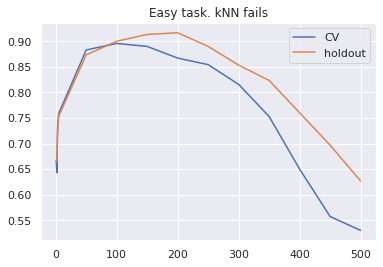

In [60]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)

from sklearn.model_selection import cross_val_score

cv_scores, holdout_scores = [], []
n_neighb = [1, 2, 3, 5] + list(range(50, 550, 50))

for k in n_neighb:

    knn_pipe = Pipeline([('scaler', StandardScaler()), 
                     ('knn', KNeighborsClassifier(n_neighbors=k))])
    cv_scores.append(np.mean(cross_val_score(knn_pipe, X_train, y_train, cv=5)))
    knn_pipe.fit(X_train, y_train)
    holdout_scores.append(accuracy_score(y_holdout, knn_pipe.predict(X_holdout)))

plt.plot(n_neighb, cv_scores, label='CV')
plt.plot(n_neighb, holdout_scores, label='holdout')
plt.title('Easy task. kNN fails')
plt.legend();

In [61]:
tree = DecisionTreeClassifier(random_state=17, max_depth=1)
tree_cv_score = np.mean(cross_val_score(tree, X_train, y_train, cv=5))
tree.fit(X_train, y_train)
tree_holdout_score = accuracy_score(y_holdout, tree.predict(X_holdout))
print('Decision tree. CV: {}, holdout: {}'.format(tree_cv_score, tree_holdout_score))

Decision tree. CV: 1.0, holdout: 1.0


Во втором примере дерево прекрасно решило задачу, в то время как k-NN испытывал трудности. Однако, скорее всего, это недостаток использования метрики Евклидова расстояния. Это не позволило выявить, что один признпк была намного лучше, чем другие.

## 6. Плюсы и минусы деревьев решений и метода ближайших соседей

### Деревья решений

Плюсы:
- Выработка четких, понятных человеку правил классификации, например: "если возраст < 25 лет и есть интерес к мотоциклами, отказать в кредите". Это свойство называется интерпретируемостью модели.
- Деревья решений могут быть легко визуализированы, т. е. как сама модель (дерево), так и прогноз для определенного тестового объекта (путь в дереве) могут быть "интерпретированы".
- Быстрое обучение и прогнозирование.
- Небольшое количество параметров модели.
- Поддерживает как числовые, так и категориальные признаки.

Минусы:
- Деревья очень чувствительны к шуму во входных данных; вся модель может измениться, если обучающий набор будет немного изменен (например, удалить объект, добавить некоторые объекты). Это ухудшает интерпретируемость модели.
- Разделительная граница, построенная деревом решений, имеет свои ограничения – она состоит из гиперплоскостей, перпендикулярных одной из координатных осей, что на практике уступает по качеству некоторым другим методам.
- Мы должны избегать переобучения путем отсечения, установки минимального количества элементов в каждом листе или определения максимальной глубины для дерева. Обратите внимание, что переобучение является проблемой для всех методов машинного обучения.
- Нестабильность. Небольшие изменения в данных могут существенно изменить дерево решений. Эта проблема решается с помощью ансамблей деревьев решений (обсудим в следующий раз).
- Задача поиска оптимального дерева решений является NP-полной. На практике используются некоторые эвристики, такие как жадный поиск объекта с максимальным получением информации, но это не гарантирует нахождения глобально оптимального дерева.
- Трудности с поддержкой пропущенных значений в данных. Фридман подсчитал, что для поддержки пропусков в данных в CART потребовалось около 50% кода (улучшенная версия этого алгоритма реализована в `sklearn`).
- Модель может только интерполировать, но не экстраполировать (то же самое верно для случайных лесов и бустинга на деревьях). То есть дерево решений делает постоянное предсказание для объектов, которые лежат за пределами ограничивающего прямоугольника, установленного обучающим набором в пространстве объектов. В нашем примере с желтыми и синими шарами это означало бы, что модель дает одинаковые прогнозы для всех шаров с координатами > 19 или < 0.

### Метод ближайших соседей

Плюсы:
- Простая реализация;
- Хорошо изученный;
- Как правило, метод является хорошим первым решением не только для классификации или регрессии, но и для рекомендаций;
- Он может быть адаптирован к определенной проблеме, выбрав правильные метрики или ядро (в двух словах, ядро может установить операцию подобия для сложных объектов, таких как графики, сохраняя при этом подход k-NN одинаковым). Кстати, [Александр Дьяконов](https://www.kaggle.com/dyakonov), бывший топ-1 kaggler, любит простейший k-NN, но с настроенной метрикой подобия объекта;
- Хорошая интерпретируемость. Есть исключения: если количество соседей велико, то интерпретируемость ухудшается ("мы не дали ему кредит, потому что он похож на 350 клиентов, из которых 70 плохие, и это на 12% выше среднего по набору данных").

Минусы:
- Метод считается быстрым по сравнению с композициями алгоритмов, но число соседей, используемых для классификации, обычно велико (100-150) в реальной жизни, и в этом случае алгоритм не будет работать так же быстро, как дерево решений.
- Если набор данных имеет много переменных, трудно найти правильные веса и определить, какие параметры не важны для классификации/регрессии.
- Зависимость от выбранной метрики расстояния между объектами. Выбор Евклидова расстояния по умолчанию часто необоснован. Вы можете найти хорошее решение путем перебора параметров, но это становится очень трудоемким для больших наборов данных.
- Нет никаких теоретических способов выбора числа соседей - только перебор (хотя это часто верно для всех гиперпараметров всех моделей). В случае небольшого числа соседей метод чувствителен к выбросам, то есть он склонен к переобучению.
- Как правило, плохо работает, когда есть много возможностей из-за"проклятия размерности". Профессор Педро Домингос, известный член сообщества ML, говорит об этом [здесь] (https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf) в своей популярной статье "несколько полезных вещей, которые нужно знать о машинном обучении"; также "проклятие размерности" описано в книге глубокого обучения в [этой главе] (http://www.deeplearningbook.org/contents/ml.html).

Здесь много информации, но, надеюсь, эта статья будет отличным справочником для вас на долгое время :)

## 7.Полезные ресурсы
- Основной курс [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), и YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)
- Medium ["story"](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-3-classification-decision-trees-and-k-nearest-neighbors-8613c6b6d2cd) based on this notebook
- Материалы курса на [Kaggle Dataset](https://www.kaggle.com/kashnitsky/mlcourse)
- Статья [article](https://habrahabr.ru/company/ods/blog/322534/) на Habrahabr с тем же материалом. И [лекция](https://youtu.be/p9Hny3Cs6rk) на YouTube
- Деревья решений и k ближайших соседей освещаются практически в каждой книге ML. Мы рекомендуем “распознавание образов и машинное обучение “(К. Бишоп) и” машинное обучение: вероятностная перспектива " (К. Мерфи).
- Книга "машинное обучение в действии" (П. Харрингтон) проведет вас через реализации классических алгоритмов ML на чистом Python.
- [Scikit-learn](http://scikit-learn.org/stable/documentation.html) библиотека. Эти ребята упорно работают над написанием действительно понятной документации.
- Scipy 2017 [scikit-learn tutorial](https://github.com/amueller/scipy-2017-sklearn) Алекс Грамфорт и Андреас Мюллер..
- Еще один [ML курс](https://github.com/diefimov/MTH594_MachineLearning) с очень корошими материалами.
- [Реализации](https://github.com/rushter/MLAlgorithms) многихy ML алгоритмов. Помогает при поиске деревьев решений и k-NN.

Автор: [Юрий Кашницкий](https://yorko.github.io). Переведено и отредактировано [Кристиной Буцко](https://www.linkedin.com/in/christinabutsko/), Глеб Филатов и [Yuanyuan Pao] (https://www.linkedin.com/in/yuanyuanpao/). Данный материал подпадает под действие условий и положений [Creative Commons CC BY-NC-SA 4.0] (https://creativecommons.org/licenses/by-nc-sa/4.0/) лицензии. Бесплатное использование разрешено для любых некоммерческих целей.